[View in Colaboratory](https://colab.research.google.com/github/BoardzMaster/machine-learning-master/blob/master/cnn_test.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/"

 Books			  'radar wind profiler'   ПГ_лонги.rar	'Фото_отказ '
 Colab			   sign.jpg		  Статья	'ЭЛ. Подпись'
 IMG-20160615-WA0001.jpg   Данные.txt.gdoc	  Суд


In [3]:
! pip install pydicom

    100% |████████████████████████████████| 7.3MB 1.0MB/s 


In [4]:
#import libraries
import pydicom
import cv2
import os
import sys
import numpy
import pandas as pd
from matplotlib  import  cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import numpy as np
import keras
import tensorflow

Using TensorFlow backend.


In [5]:
print(os.listdir("drive"))


['My Drive', '.Trash']


In [6]:
!pip install -r "drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/requirements.txt"

    100% |████████████████████████████████| 2.1MB 14.3MB/s 
    100% |████████████████████████████████| 634kB 22.9MB/s 
    100% |████████████████████████████████| 3.1MB 9.5MB/s 
    100% |████████████████████████████████| 163kB 32.3MB/s 
    100% |████████████████████████████████| 112kB 35.1MB/s 
    100% |████████████████████████████████| 112kB 29.2MB/s 
    100% |████████████████████████████████| 204kB 30.7MB/s 
    100% |████████████████████████████████| 552kB 27.8MB/s 
    100% |████████████████████████████████| 71kB 21.8MB/s 
    100% |████████████████████████████████| 8.1MB 5.4MB/s 
    100% |████████████████████████████████| 2.2MB 17.7MB/s 
  Running setup.py bdist_wheel for imgaug ... - \ done
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug


In [7]:
!python3 "drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/colab_setup.py" install


running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/drive
creating build/lib/drive/My Drive
creating build/lib/drive/My Drive/Colab
creating build/lib/drive/My Drive/Colab/Kaggle_RSA_Competition
creating build/lib/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master
creating build/lib/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mrcnn
copying drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mrcnn/model.py -> build/lib/drive/My Drive/Colab/Kaggle_RSA_Competit

In [0]:
# Root directory of the RCNN lib
ROOT_DIR = os.path.abspath("drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the lib
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log



In [23]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master',
 '/',
 '/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master']

In [24]:
class DetectorConfig(Config):
    """Override config class in mrcnn lib for Pneumonia detection on the RSNA kaggle dataset.
    """

    # Give the configuration a recognizable name
    NAME = 'Pneumonia'

    # Train on 1 GPU and 1 images per GPU. We can put multiple images on each

    GPU_COUNT = 1
    IMAGES_PER_GPU = 5

    BACKBONE = 'resnet50'

    NUM_CLASSES = 2  # background (BG) + 1 Pneumonia classes

    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 70

  

Config = DetectorConfig()
Config.display()



Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     5
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 5
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [0]:
class DetectorDataset(utils.Dataset):
    """Override Dataset class in mrcnn lib for Pneumonia detection on the RSNA kaggle dataset.
       Could be used for loading train/test/validation datasets
    """

    def __init__(self, image_list, image_information, height, width):
        super().__init__(self)

        # Add classes - we need just 1 class ('Pneumonia')
        self.add_class('Pneumonia', 1, 'Lung Opacity')

        # add images
        for i, file_path in enumerate(image_list):
            image_info_box = image_information[file_path]
            self.add_image('Pneumonia', image_id=i, path=file_path,
                           image_information=image_info_box, image_height=height, image_width=width)

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        file_path = info['path']
        dicom_file = pydicom.read_file(file_path)
        image = dicom_file.pixel_array
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        image_information = info['image_information']

        box_counter = len(image_information)
        
        if box_counter == 0:
            mask = np.zeros((info['image_height'], info['image_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['image_height'], info['image_width'], box_counter), dtype=np.uint8)
            class_ids = np.zeros((box_counter,), dtype=np.int32)
            for i, box in enumerate(image_information):
                if box['Target'] == 1:
                    x = int(box['x'])
                    y = int(box['y'])
                    width = int(box['width'])
                    height = int(box['height'])
                    
                    mask_inst = mask[:, :, i].copy()

                    cv2.rectangle(mask_inst, (x, y), (x + width, y + height), 255, -1)
                    mask[:, :, i] = mask_inst
                    class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

In [12]:
Path_train_dicom_image = "drive/My Drive/Colab/Kaggle_RSA_Competition/stage_1_train_images/"

Path_train_boxes_image = "drive/My Drive/Colab/Kaggle_RSA_Competition/stage_1_train_labels.csv"

path_additional_info = "drive/My Drive/Colab/Kaggle_RSA_Competition/stage_1_detailed_class_info.csv"

print(os.listdir("drive/My Drive/Colab/Kaggle_RSA_Competition"))

['cnn_test.ipynb', '__init__.py', 'Mask_RCNN_model.py', 'Mask_RCNN-master', 'stage_1_train_labels.csv', 'stage_1_detailed_class_info.csv', 'stage_1_sample_submission.csv', 'GCP Credits Request Link - RSNA.txt', 'stage_1_train_images', 'stage_1_test_images']


In [0]:
def dataset_load (image_dir, image_info_file):
    lstFilesDCM = []
    for dirName, subdirList, fileList in os.walk(image_dir):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))

    image_info = {pat: [] for pat in lstFilesDCM}
    for index, row in image_info_file.iterrows():
        pat = os.path.join(image_dir, row['patientId']+'.dcm')
        image_info[pat].append(row)
    return lstFilesDCM, image_info

In [14]:
boxes_labels = pd.read_csv(Path_train_boxes_image)
boxes_labels.info()
boxes_labels.head()   

additional_info = pd.read_csv(path_additional_info)
additional_info.info() 
additional_info.head()

image_file_list, image_info = dataset_load(Path_train_dicom_image, boxes_labels )

ORIG_SIZE = 1024


len_data = len(image_file_list)

train_size = int(len_data*0.8)
print(train_size)

image_file_list_train = image_file_list[:train_size]
image_file_list_val = image_file_list[train_size:]

dataset_train = DetectorDataset(image_file_list[:train_size], image_info, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

dataset_val = DetectorDataset(image_file_list[train_size:], image_info, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28989 entries, 0 to 28988
Data columns (total 6 columns):
patientId    28989 non-null object
x            8964 non-null float64
y            8964 non-null float64
width        8964 non-null float64
height       8964 non-null float64
Target       28989 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28989 entries, 0 to 28988
Data columns (total 2 columns):
patientId    28989 non-null object
class        28989 non-null object
dtypes: object(2)
memory usage: 453.0+ KB
20547


(1024, 1024, 3)
drive/My Drive/Colab/Kaggle_RSA_Competition/stage_1_train_images/e6ec8809-e44d-4802-9386-8f5ec351f03f.dcm
[1]


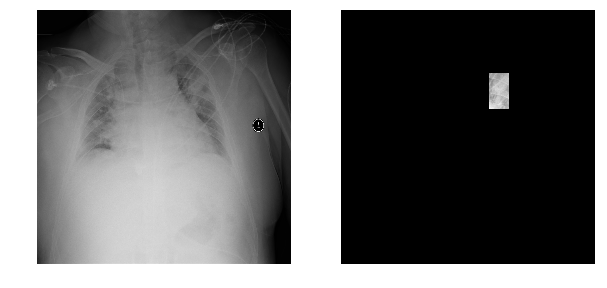

In [15]:
class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)

In [0]:
COCO_WEIGHTS_PATH = "drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mask_rcnn_coco.h5"

In [0]:
 CNN_model = modellib.MaskRCNN(mode='training', config=Config, model_dir=ROOT_DIR)



In [0]:
# Exclude the last layers because they require a matching
# number of classes
CNN_model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

In [0]:
import time

LEARNING_RATE = 0.005

# Train Mask-RCNN Model 
import warnings 
warnings.filterwarnings("ignore")

In [29]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
CNN_model.train(dataset_train, dataset_val, 
            learning_rate=LEARNING_RATE, 
            epochs=1, 
            layers='heads')


Starting at epoch 0. LR=0.005

Checkpoint Path: /content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/pneumonia20181023T1928/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mr

In [32]:
%%time

CNN_model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE/3,
            epochs=30,
            layers='all')

history = CNN_model.keras_model.history.history


Starting at epoch 20. LR=0.0016666666666666668

Checkpoint Path: /content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/pneumonia20181023T1928/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch

In [0]:
# save coefficients
model_path = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")
CNN_model.keras_model.save_weights(model_path)


In [42]:
model_path 


'/content/drive/My Drive/Colab/Kaggle_RSA_Competition/Mask_RCNN-master/mask_rcnn_shapes.h5'